In [1]:
import load_data

All data available


In [4]:
consonants_img, consonants_labels = load_data.PIL_list_data('consonants')
vowels_img, vowels_labels = load_data.PIL_list_data('vowels')
numerals_img, numerals_labels = load_data.PIL_list_data('numerals')

Raw consonants loaded, 7380 obs of 37 classes
Raw vowels loaded, 2652 obs of 13 classes
Raw numerals loaded, 2880 obs of 11 classes


Some unprocessed numerals:


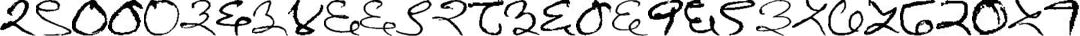

Some unprocessed vowels:


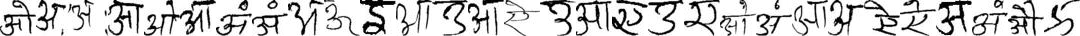

Some unprocessed consonants:


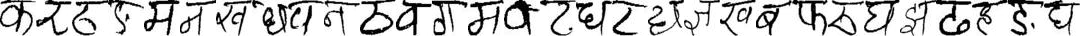

In [56]:
from IPython.display import display
from numpy import concatenate
from random import sample

def display_some(img_list, n=30):
    to_display = sample(img_list,n)
    display(Image.fromarray(concatenate(to_display,axis=1)))
    
print("Some unprocessed numerals:")
display_some(numerals_img)
print("Some unprocessed vowels:")
display_some(vowels_img)
print("Some unprocessed consonants:")
display_some(consonants_img)

Some inverted numerals:


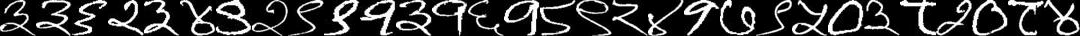

Some inverted vowels:


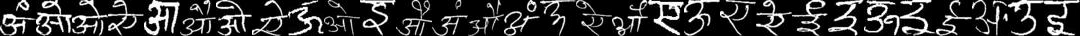

Some inverted consonants:


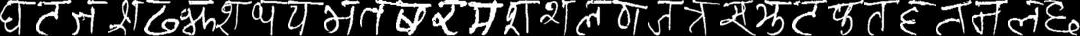

In [67]:
from PIL import ImageOps  

def pre_process(img_list):
    img_bw = [img.convert('LA') for img in img_list]
    return [ImageOps.invert(img) for img in img_list]

consonants_proc = pre_process(consonants_img)
vowels_proc = pre_process(vowels_img)
numerals_proc = pre_process(numerals_img)

print("Some inverted numerals:")
display_some(numerals_proc)
print("Some inverted vowels:")
display_some(vowels_proc)
print("Some inverted consonants:")
display_some(consonants_proc)

In [96]:
import numpy as np

def to_vectors(img_list):
    
    def vectorize_one_img(img):
        flattened_img = np.asmatrix(img).flatten()
        rescaled_img = np.divide(flattened_img,255.0)
        return np.asarray(rescaled_img)[0]
        
    return [vectorize_one_img(img) for img in img_list]

consonants_inputs = to_vectors(consonants_proc)
vowels_inputs = to_vectors(vowels_proc)
numerals_inputs = to_vectors(numerals_proc)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def best_SVC(X,y):
    
    svc_model = SVC()
    param_dic = {'C':[1, 10 , 100, 10e3, 10e4],
                'gamma':[0.001,0.01,0.1]}
    clf = GridSearchCV(svc_model, param_dic, n_jobs=-1)
    clf.fit(X, y)
    print("Best parameters: ", clf.best_params_)
    return clf.best_estimator_
    
def benchmark(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    pca = PCA(n_components = 16)
    pca.fit(X_train)
    reduced_X_train, reduced_X_test = pca.transform(X_train), pca.transform(X_test)
    
    best_model = best_SVC(X_train,y_train)
    predictions = best_model.predict(X_test)
    return accuracy_score(y_test, predictions)
    

In [111]:
score_on_numerals = benchmark(numerals_inputs, numerals_labels)
print("Best accuracy on numerals: {}".format(score_on_numerals))

score_on_vowels = benchmark(vowels_inputs, vowels_labels)
print("Best accuracy on vowels: {}".format(score_on_vowels))

score_on_consonants = benchmark(consonants_inputs, consonants_labels)
print("Best accuracy on consonants: {}".format(score_on_consonants))

('Best parameters: ', {'C': 10, 'gamma': 0.01})
Best accuracy on numerals: 0.979166666667
('Best parameters: ', {'C': 10, 'gamma': 0.01})
Best accuracy on vowels: 0.906485671192
('Best parameters: ', {'C': 10, 'gamma': 0.01})
Best accuracy on consonants: 0.722493224932
